In [637]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [638]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels import api as sm
from sklearn.preprocessing import StandardScaler

In [639]:
df = pd.read_csv('insurance.csv')

### Preprocessing

In [640]:
df.shape

(1338, 7)

#### Null Checking

In [641]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Duplicate checking 

In [642]:
df.duplicated().sum()

1

In [643]:
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [644]:
df.drop_duplicates(keep='first',inplace=True)

In [645]:
df.duplicated().sum()

0

In [652]:
# np.isnan(df)

In [653]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


#### Outliers checking 

In [654]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


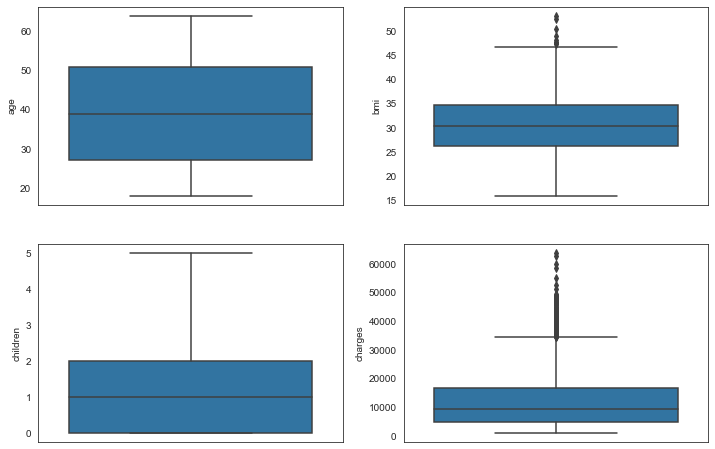

In [655]:
# plt.figure(figsize=())
boxoutliers, ax = plt.subplots(nrows=2,ncols=2,figsize=(12,8))
sns.boxplot(data=df,y='age',ax=ax[(0,0)])
sns.boxplot(data=df,y='bmi',ax=ax[(0,1)])
sns.boxplot(data=df,y='children',ax=ax[(1,0)])
sns.boxplot(data=df,y='charges',ax=ax[(1,1)])
plt.show()

In [656]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

### EDA

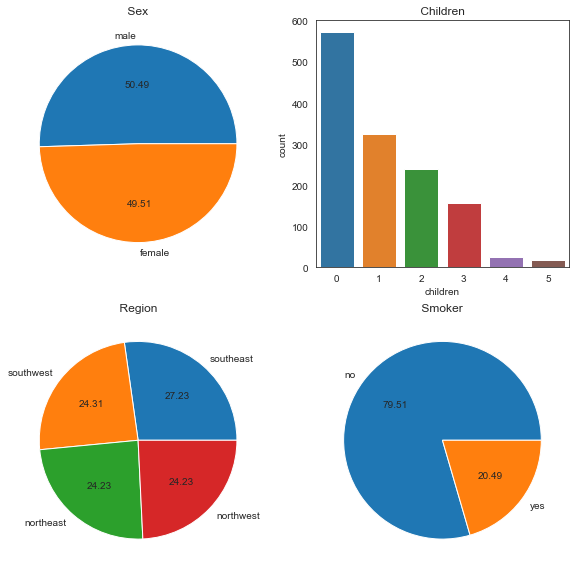

In [657]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.pie(x=df['sex'].value_counts().values,labels=df['sex'].value_counts().index,autopct='%.2f')
plt.title(' Sex ')
plt.subplot(2,2,2)
sns.countplot(data=df,x='children')
plt.title(' Children ',)
plt.subplot(2,2,3)
plt.pie(x=df['region'].value_counts().values,labels=df['region'].value_counts().index,autopct='%.2f')
plt.title(' Region ')
plt.subplot(2,2,4)
plt.pie(x=df['smoker'].value_counts().values,labels=df['smoker'].value_counts().index,autopct='%.2f')
plt.title(' Smoker ')
plt.show()

In [658]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<AxesSubplot:xlabel='sex', ylabel='charges'>

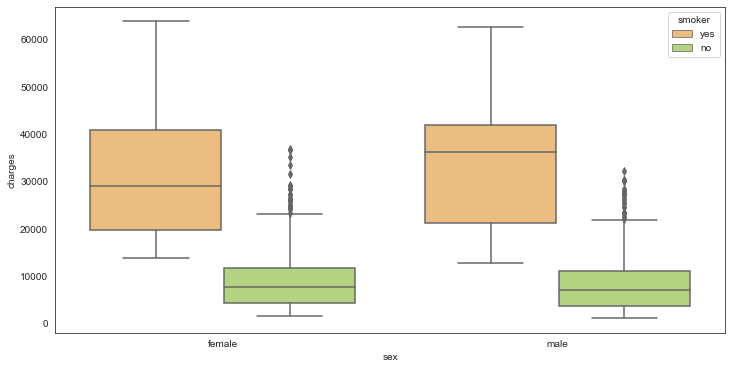

In [659]:
plt.figure(figsize = (12,6))
sns.set_style('white')
sns.boxplot(x='sex', y= 'charges', data = df, palette ='RdYlGn', hue = 'smoker')
# sns.despine(left = True)

<AxesSubplot:xlabel='age', ylabel='charges'>

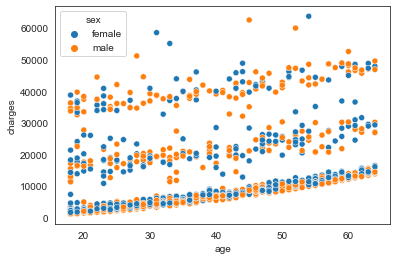

In [660]:
sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'sex')

<AxesSubplot:xlabel='age', ylabel='charges'>

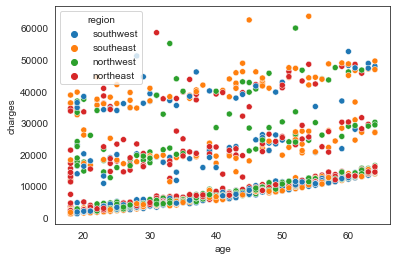

In [661]:
sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'region')

<AxesSubplot:xlabel='age', ylabel='charges'>

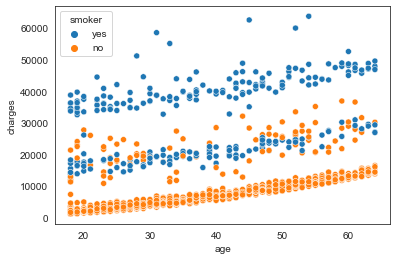

In [662]:
sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'smoker')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

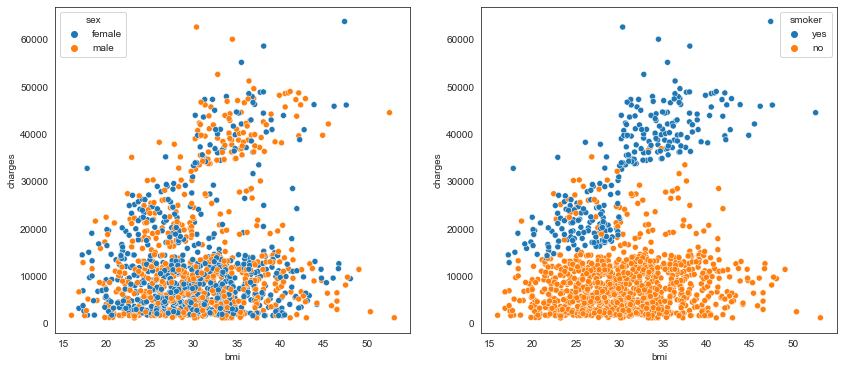

In [663]:
fig, ax = plt.subplots(nrows= 1, ncols = 2, figsize= (14,6))
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'sex', ax= ax[0])
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'smoker', ax = ax[1])

In [664]:
corr_matrix = df.corr()
corr_matrix

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


## Advance Preprocessing

In [665]:
from sklearn.preprocessing import LabelEncoder

In [666]:
le = LabelEncoder()

In [667]:
df2 = df.copy()

In [668]:
df2['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [669]:
df2['sex'] = pd.DataFrame(le.fit_transform(df2['sex']))
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,yes,southwest,16884.92400
1,18,1.0,33.770,1,no,southeast,1725.55230
2,28,1.0,33.000,3,no,southeast,4449.46200
3,33,1.0,22.705,0,no,northwest,21984.47061
4,32,1.0,28.880,0,no,northwest,3866.85520


In [670]:
df2['smoker'] = pd.DataFrame(le.fit_transform(df2['smoker']))
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,southwest,16884.92400
1,18,1.0,33.770,1,0.0,southeast,1725.55230
2,28,1.0,33.000,3,0.0,southeast,4449.46200
3,33,1.0,22.705,0,0.0,northwest,21984.47061
4,32,1.0,28.880,0,0.0,northwest,3866.85520


In [671]:
df2['region'] = pd.DataFrame(le.fit_transform(df2['region']))
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520


In [672]:
df = df2.copy()
del df2

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520


In [673]:
df = df.drop(['children','region'],axis=1)
df.head(2)

,age,sex,bmi,smoker,charges
0,19,0.0,27.90,1.0,16884.9240
1,18,1.0,33.77,0.0,1725.5523


In [674]:
x = df.drop(['charges'],axis=1)
y = df[['charges']]


### Train Test Split

In [675]:
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=13)

In [676]:
x_train.shape,y_train.shape

((1002, 4), (1002, 1))

In [677]:
x_test.shape,y_test.shape

((335, 4), (335, 1))

In [678]:
np.isinf(df).sum()

age        0
sex        0
bmi        0
smoker     0
charges    0
dtype: int64

### One Last Time Visualizing Data
### For Confirming Our x variables

In [679]:
df.columns

Index(['age', 'sex', 'bmi', 'smoker', 'charges'], dtype='object')

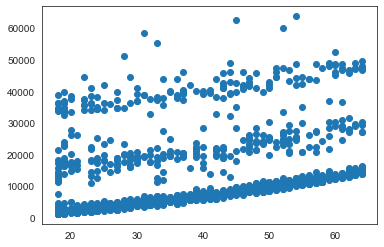

In [680]:
plt.scatter(df['age'],df['charges'])

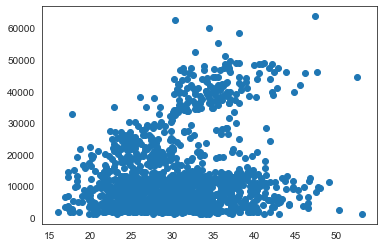

In [681]:
plt.scatter(df['bmi'],df['charges'])

In [682]:
df.corr()

,age,sex,bmi,smoker,charges
age,1.000000,-0.055025,0.109344,-0.005470,0.298308
sex,-0.055025,1.000000,-0.021148,0.077008,0.046201
bmi,0.109344,-0.021148,1.000000,-0.025284,0.198401
smoker,-0.005470,0.077008,-0.025284,1.000000,0.327108
charges,0.298308,0.046201,0.198401,0.327108,1.000000


In [683]:
### Sex also doesnt matter

In [684]:
# x_train.describe()

In [685]:
print(np.isnan(x_train).sum())
print(np.isnan(y_train).sum())

age       0
sex       1
bmi       0
smoker    1
dtype: int64
charges    0
dtype: int64


In [686]:
nan_mask = np.isnan(x_train['smoker'])
nan_mask

161     False
1151    False
644     False
905     False
198     False
        ...  
867     False
743     False
74      False
176     False
338     False
Name: smoker, Length: 1002, dtype: bool

In [687]:
x_train[np.isnan(x_train['smoker'])]

,age,sex,bmi,smoker
1337,61,NaN,29.07,NaN


In [688]:
x_train[nan_mask]

,age,sex,bmi,smoker
1337,61,NaN,29.07,NaN


In [689]:
y_train[np.isnan(x_train['smoker'])]

,charges
1337,29141.3603


In [690]:
x_train = x_train[~nan_mask]

y_train = y_train[~nan_mask]


In [691]:
x_train.shape

(1001, 4)

In [692]:
y_train.shape

(1001, 1)

In [693]:
print(np.isnan(x_test).sum())
print(np.isnan(y_test).sum())

age       0
sex       0
bmi       0
smoker    0
dtype: int64
charges    0
dtype: int64


In [694]:
print(np.isinf(x_train).sum())
print(np.isinf(y_train).sum())

age       0
sex       0
bmi       0
smoker    0
dtype: int64
charges    0
dtype: int64


In [695]:
print(np.isinf(x_test).sum())
print(np.isinf(y_test).sum())

age       0
sex       0
bmi       0
smoker    0
dtype: int64
charges    0
dtype: int64


In [696]:
np.isinf(x_train).sum()

age       0
sex       0
bmi       0
smoker    0
dtype: int64

### MLR without scaling data

In [697]:
lr1 = LinearRegression()

In [698]:
lr1.fit(x_train,y_train)

LinearRegression()

In [699]:
y_pred = lr1.predict(x_test)

In [700]:
mse1 = mean_squared_error(y_pred,y_test)
mse1

109166224.06765959

In [701]:
np.sqrt(mse1)

10448.264165288872

In [702]:
df['charges'].sort_values(ascending=False).head()

543     63770.42801
1300    62592.87309
1230    60021.39897
577     58571.07448
819     55135.40209
Name: charges, dtype: float64

### OLS Model

In [703]:
olsmodel = sm.OLS(y_train,x_train)

In [704]:
result1 = olsmodel.fit()

In [705]:
old_pred = result1.predict(x_test)

In [706]:
mse2 = mean_squared_error(old_pred,y_test)
mse2

111993955.44662845

In [707]:
np.sqrt(mse2)

10582.719662101441

In [708]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.648
Model:                            OLS   Adj. R-squared (uncentered):              0.647
Method:                 Least Squares   F-statistic:                              459.3
Date:                Tue, 28 May 2024   Prob (F-statistic):                   2.18e-224
Time:                        17:31:04   Log-Likelihood:                         -10718.
No. Observations:                1001   AIC:                                  2.144e+04
Df Residuals:                     997   BIC:                                  2.146e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          194.3339     22.474      8.647      0.000     150.233     238.435
sex          185.5228    676.540      0.274      0.784   -1142.084    1513.129
bmi          128.6257     32.215      3.993      0.000      65.408     191.843
smoker      9729.2889    828.989     11.736      0.000    8102.525    1.14e+04
==============================================================================
Omnibus:                      226.575   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              410.562
Skew:                           1.384   Prob(JB):                     7.04e-90
Kurtosis:                       4.478   Cond. No.                         125.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [711]:
x_train

,age,sex,bmi,smoker
161,18,0.0,36.850,1.0
1151,58,0.0,36.480,1.0
644,43,1.0,35.310,0.0
905,26,1.0,29.355,0.0
198,51,0.0,18.050,0.0
...,...,...,...,...
867,57,1.0,43.700,0.0
743,31,1.0,26.620,0.0
74,44,1.0,27.400,0.0
176,38,1.0,27.835,0.0


### Sex data does not contribute to model
### Removing sex columns

In [712]:
x_train = x_train.drop('sex',axis=1)

In [713]:
x_test = x_test.drop('sex',axis=1)

In [716]:
x_test.head(2)

,age,bmi,smoker
393,49,31.350,0.0
1041,18,23.085,1.0


In [717]:
olsmodel2 = sm.OLS(y_train,x_train)
result3 = olsmodel2.fit()

ols_pred_2 = result2.predict(x_test)
mse3 = mean_squared_error(ols_pred_2,y_test)

print('mse = ',mse3)
print('rmse = ',np.sqrt(mse3))

mse =  112038659.36955726
rmse =  10584.831570202583


In [718]:
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.648
Model:                            OLS   Adj. R-squared (uncentered):              0.647
Method:                 Least Squares   F-statistic:                              612.9
Date:                Tue, 28 May 2024   Prob (F-statistic):                   8.42e-226
Time:                        17:31:50   Log-Likelihood:                         -10718.
No. Observations:                1001   AIC:                                  2.144e+04
Df Residuals:                     998   BIC:                                  2.146e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          194.3167     22.463      8.650      0.000     150.236     238.397
bmi          131.4302     30.535      4.304      0.000      71.511     191.350
smoker      9749.6307    825.281     11.814      0.000    8130.146    1.14e+04
==============================================================================
Omnibus:                      226.035   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              408.851
Skew:                           1.382   Prob(JB):                     1.66e-89
Kurtosis:                       4.471   Cond. No.                         124.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Again Trying Multiple Linear Regression without sex columns

In [719]:
lr2 = LinearRegression()

lr2.fit(x_train,y_train)

LinearRegression()

In [720]:
y_pred_2 = lr2.predict(x_test)
mse4 = mean_squared_error(y_test,y_pred_2)

print('mse = ',mse4)
print('rmse = ',np.sqrt(mse4))

mse =  109573383.31161185
rmse =  10467.730571217997


### Trying SVR from SVM

In [721]:
reg = SVR(kernel='rbf')

In [722]:
np.array(y_train).ravel()

array([36149.4835 , 12235.8392 , 18806.14547, ...,  7726.854  ,
        6455.86265, 41919.097  ])

In [723]:
reg.fit(x_train,np.array(y_train).ravel())

SVR()

In [724]:
pred_svr = reg.predict(x_test)

In [725]:
mse_svr = mean_squared_error(pred_svr,y_test)

mse_svr

146004146.06889832

In [726]:
np.sqrt(mse_svr)

12083.21753792831

In [727]:
x_train.head(2)

,age,bmi,smoker
161,18,36.85,1.0
1151,58,36.48,1.0


### Scaling Data

In [761]:
ss = StandardScaler()

In [762]:
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.fit_transform(x_test)

In [763]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=['age','bmi','smoker'])
x_test_scaled = pd.DataFrame(x_test_scaled,columns=['age','bmi','smoker'])

In [764]:
reg2 = SVR(kernel='rbf')
reg2.fit(x_train_scaled,np.array(y_train).ravel())

pred_svr_2 = reg.predict(x_test_scaled)

mse_svr_2 = mean_squared_error(pred_svr_2,y_test)

mse_svr

146004146.06889832

In [765]:
np.sqrt(mse_svr_2)

12118.32981010389

In [768]:
np.mean((np.array(y_test)-np.array(pred_svr_2))**2)

146828972.6215072

In [774]:
for i in df.charges:
    print(i,end=',')

16884.924,1725.5523,4449.462,21984.47061,3866.8552,3756.6216,8240.5896,7281.5056,6406.4107,28923.136919999997,2721.3208,27808.7251,1826.8429999999998,11090.7178,39611.7577,1837.237,10797.3362,2395.17155,10602.385,36837.467000000004,13228.84695,4149.736,1137.011,37701.8768,6203.90175,14001.1338,14451.83515,12268.63225,2775.19215,38711.0,35585.576,2198.18985,4687.7970000000005,13770.0979,51194.55914,1625.43375,15612.19335,2302.3,39774.2763,48173.361,3046.062,4949.7587,6272.4772,6313.759,6079.6715,20630.28351,3393.35635,3556.9223,12629.8967,38709.176,2211.13075,3579.8287,23568.272,37742.5757,8059.6791,47496.49445,13607.36875,34303.1672,23244.7902,5989.52365,8606.2174,4504.6624,30166.618169999998,4133.64165,14711.7438,1743.214,14235.072,6389.37785,5920.1041,17663.1442,16577.7795,6799.4580000000005,11741.726,11946.6259,7726.854,11356.6609,3947.4131,1532.4697,2755.02095,6571.02435,4441.21315,7935.29115,37165.1638,11033.6617,39836.519,21098.55405,43578.9394,11073.176000000001,8026.6666,11082.

In [776]:
x_train_scaled.describe()

,age,bmi,smoker
count,1.001000e+03,1.001000e+03,1.001000e+03
mean,-2.107316e-18,6.676866e-16,5.656481e-17
std,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.541109e+00,-2.430312e+00,-5.276517e-01
25%,-8.968765e-01,-7.029575e-01,-5.276517e-01
50%,3.368114e-02,-7.257229e-02,-5.276517e-01
75%,8.210760e-01,6.347497e-01,-5.276517e-01
max,1.751634e+00,3.719666e+00,1.895189e+00


In [780]:
x_train_scaled.head(2)

,age,bmi,smoker
0,-1.541109,1.026052,1.895189
1,1.322145,0.964833,1.895189


In [779]:
ss.fit_transform(df[['age']])

array([[-1.44041773],
       [-1.51164747],
       [-0.79935006],
       ...,
       [-1.51164747],
       [-1.29795825],
       [ 1.55123139]])